<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"> 

# Data Science on the Net!
---

## Learning Objectives
* **Explain** how HTTP works
* **Make** HTTP requests from Python
* **Read** API documentation and get the data
* **Scrape** a website using BeautifulSoup



![](http://i.imgur.com/zjwHc.jpg)

## Part 1: HTML = The Language of the Web
HTML is a language that describes the "nouns" of the internet. HTML objects come in _tags_ that look like this:

```html
<tag>Contents of the tag</tag>
```

Let's go to a website (any website!) and open the object viewer by pressing **Ctrl-Shift-i**.
Maybe:
* www.washingtonpost.com
* www.example.com
* www.realpython.com

HTML tags can have **classes** and **ids**, too.
* **Classes** are non-unique descriptors that you can use to identify various HTML tags by a joining quality. For example, you might define a "foreground" class. You can use CSS to then color all "foreground" class objects blue.
* **ids** are _unique_ descriptors. They work the same as classes, except there can only be one tag per id.

For example:
```html
<p class="speech" id="gettysburg">Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.</p>
```

## Part 2: The HTTP Protocol
HTTP is the **hypertext transfer protocol**. It's just a system of rules for throwing data around the internet.

> Aside: There are other protocols you might have heard of. For example: FTP (file transfer protocol), SFTP (Secure FTP), and IP (internet protocol).

You can interact using the HTTP via different kinds of **requests**. There are several of them, but two are used most widely: **GET** and **POST**.
* The GET request is for getting data.
    - What Tweets are in my news feed?
* The POST request is for telling a server what data _you_ have, often times causing the server to act upon it.
    - Post this Tweet espousing my controversial political opinions!

HTTP requests also have **response codes (response statuses)**. You've probably heard of 404 (page not found). But there are many more: 200 (everything good), 300 (redirection), 401 (unauthorized).
    
Let's go to any of those previous websites and go to the "Network" tab of the object viewer. Refresh the page. Every line you see is a series of HTTP requests and their response codes.

## Part 3: The `requests` Library & APIs
The `requests` library is a library for submitting HTTP requests from Python. Despite its frequent use, it's not included in the Python standard library. You'll need to `pip install requests` yourself.
![](assets/pokeapi.png)

In [1]:
import requests

In [2]:
name = "snorlax"
pokemon = requests.get(f"https://pokeapi.co/api/v2/pokemon/{name}")

In [5]:
pokemon.url
#pokemon.text

'https://pokeapi.co/api/v2/pokemon/snorlax'

In [6]:
snorlax = pokemon.json() #converts pokemon.text from a JSON string into a Python object

In [7]:
snorlax.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'species', 'sprites', 'stats', 'types', 'weight'])

In [8]:
snorlax['weight']

4600

In [16]:
snorlax['moves'][0]['move']['name']

'mega-punch'

In [25]:
snorlax['abilities'][1]['ability']['name']

for ability in snorlax['abilities']:
    print(ability['ability']['name'])

abilities = [ability['ability']['name'] for ability in snorlax['abilities']]

print(abilities)

immunity
thick-fat
gluttony
['immunity', 'thick-fat', 'gluttony']


In [32]:
# get a list of charmander's move names?

name = 'charmander'
pokemon = requests.get(f"https://pokeapi.co/api/v2/pokemon/{name}")
charmander = pokemon.json()

charmander_moves = [ability['ability']['name'] for ability in charmander['abilities']]

print(charmander_moves)

['blaze', 'solar-power']


In [35]:
move_req = requests.get(f"https://pokeapi.co/api/v2/ability/66")
move = move_req.json()

move['flavor_text_entries'][0]['flavor_text']

'Ups FIRE moves in a pinch.'

In [39]:
def get_moves(name):
    poke_req = requests.get(f"https://pokeapi.co/api/v2/pokemon/{name}")
    pokemon = poke_req.json()
    
    ability_urls = [ability['ability']['url'] for ability in pokemon['abilities']]
    
    moves = {}
    
    for url in ability_urls:
        ability_req = requests.get(url)
        ability = ability_req.json()
        
        name = ability['name']
        text = ability['flavor_text_entries'][0]['flavor_text']
        moves[name] = description
    
    return moves

get_moves(charmander)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)


## Ok, let's try a more complicated API - for stocks!
![](assets/alpha-vantage.png)
If you haven't already - grab your free API key for Alpha Vantage [here](https://www.alphavantage.co). It takes five seconds.

**(THREAD): Why do you think companies would require the use of an API key?**

Alpha Vantage has documentation [here](https://www.alphavantage.co/documentation/).

In [41]:
# Most APIs have a single base URL from which API calls are made.
# If you look closely at the examples, this is Alpha Vantage's.
base_url = "https://www.alphavantage.co/query"
api_key = "3YRCJMBLMDH7AT2A"
intraday = 'TIME_SERIES_INTRADAY'



In [49]:
params = {'function': intraday,
          'symbol': 'IBM',
          'interval': '5min',
          'apikey': 'demo'}

req = requests.get(base_url, params=params, verify=False)
#req.text

req.url

C:\Users\614318\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.alphavantage.co'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'

In [50]:
ibm_5min = req.json()

In [57]:
import pandas as pd

ibm = pd.DataFrame.from_dict(ibm_5min['Time Series (5min)'], orient='index', dtype=float)

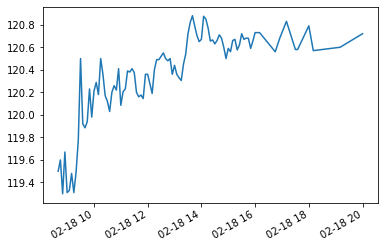

In [58]:
ibm.index = pd.to_datetime(ibm.index)

ibm['4. close'].plot();

In [ ]:
# Let's grab that data!

In [ ]:
# Well, this looks like a familiar format...

### Challenge
Write your own function that inputs a ticker symbol and outputs the above.

### Did this feel like a lot of work? You're not alone.
For web APIs such as these, open sourcerers (ordinary programmers like you and me!) like to build language-specific **API wrappers** to easier call the API. Interestingly, based on our very vague definition of APIs, API wrappers are also themselves APIs!

Alpha Vantage has a Python API wrapper made by user `RomelTorres` [here](https://github.com/RomelTorres/alpha_vantage)!

![](assets/opensource.jpg)

## You want data? You got data.

### Key Takeaway #1: Your favorite thing has a free API
* **Stock prices**: [Alpha Vantage](https://github.com/RomelTorres/alpha_vantage)
* **Cryptocurrency prices**: [ccxt](https://github.com/ccxt/ccxt) provides a unified API for several cryptocurrency markets. You can even buy and sell crypto from within Python!
* **Weather**: [OpenWeather](https://openweathermap.org/api)

### Key Takeaway #2: Your favorite website has a free API
Below is a brief list of websites that have a free API. Note that "free" here means "zero-cost", not "permissive and easy to use." APIs can be abused. Not all Twitter bots are friendly like [Every Sheriff Bot](https://twitter.com/EverySheriff).
* Twitter
* Reddit
* Yelp
* Twitch
* Facebook/Instagram
* GitHub (yes, even GitHub!)
* Most Google services
* Spotify
* Slack (no, you can't have a key.)

## Part 4: Web Scraping with Beautiful Soup!
![](https://static.datasciencedojo.com/wp-content/uploads/PythonBeautifulSoup-04-495x400.png)

The library `bs4` (Beautiful Soup) allows you to take the raw HTML from a `request` and pick out the parts you need!

In [59]:
from bs4 import BeautifulSoup

In [60]:
url = "https://example.com"
req = requests.get(url)
soup = BeautifulSoup(req.text)  # Convert to a BeautifulSoup object

In [63]:
h1s = soup.select('h1')

h1s[0].text

'Example Domain'

In [64]:
# .get_text() concatenates all descendant text nodes
soup.select('div')[0].get_text()

'\nExample Domain\nThis domain is for use in illustrative examples in documents. You may use this\n    domain in literature without prior coordination or asking for permission.\nMore information...\n'

In [69]:
title = soup.select('title')[0].get_text()

charset = soup.select('meta')[0].attrs['charset']

soup.select('meta[charset]')

[<meta charset="utf-8"/>]

In [46]:
# Get the text part of the first h1 tag

### Let's use BeautifulSoup to actually scrape a website!
Let's scrape: [Real Python](https://realpython.com), a new (very good) blog site for Python users (aimed at mostly beginners).

In [70]:
url = "https://realpython.com"
req = requests.get(url)

In [71]:
bs = BeautifulSoup(req.text)

In [73]:
# all div tags with class card-body

bs.select('div.card-body')[0]

<div class="card-body m-0 p-0 pt-3">
<a href="/python-functional-programming/">
<h2 class="card-title h2 my-0 py-0">Functional Programming in Python: When and How to Use It</h2>
</a>
<p class="my-1">In this tutorial, you'll learn about functional programming in Python. You'll see what functional programming is, how it's supported in Python, and how you can use it in your Python code.</p>
<p class="card-text">
<small class="text-muted">
<span class="mr-2">Feb 17, 2021</span>
<span class="ml-2 fa fa-tags"></span>
<a class="badge badge-light text-muted" href="/tutorials/intermediate/">intermediate</a>
<a class="badge badge-light text-muted" href="/tutorials/python/">python</a>
</small>
</p>
</div>

In [76]:
for title_tag in bs.select('h2.card-title'):
    print('-', title_tag.text)

- Functional Programming in Python: When and How to Use It
- Creating PyQt Layouts for GUI Applications
- Pandas Sort: Your Guide to Sorting Data in Python
- Python Microservices With gRPC
- Python Modulo: Using the % Operator
- Python Inner Functions: What Are They Good For?
- Qt Designer and Python: Build Your GUI Applications Faster
- Plot With Pandas: Python Data Visualization Basics
- Python Web Applications: Deploy Your Script as a Flask App
- Stochastic Gradient Descent Algorithm With Python and NumPy
- Evaluate Expressions Dynamically With Python eval()
- How to Use Python: Your First Steps
- C for Python Programmers


In [81]:
title_tag = bs.select('h2.card-title')[0]
title_tag.parent.attrs

{'href': '/python-functional-programming/'}

## Conclusion & Summary
Today, we:
* Learned how HTTP works
* Made HTTP requests from Python
* Read API documentation and got the data we want
* Scraped a website using BeautifulSoup